In [261]:
import pandas as pd
from iexfinance.stocks import Stock
from datetime import datetime
import matplotlib.pyplot as plt
from iexfinance.stocks import get_historical_data
import os
import yaml
import sys
import datetime
import glob

# used to access data directory
sys.path.insert(0,'../')

In [262]:
import pandas as pd
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
df.to_csv('S&P500-Info.csv')
df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])

In [263]:
#  source ~/.ssh/iex_key.sh
# ENV var IEX_KEY
API_TOKEN=    credentials = yaml.load(open(os.path.expanduser(
        '~/.ssh/api_credentials.yml')))['iex']['api_key']

/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [264]:
API_TOKEN

'pk_291949b3b45c490fa2a95869d87121c5'

In [265]:
sp = pd.read_csv('../data/S&P500-Symbols.csv', index_col=[0])


In [266]:
sp

,Symbol
0,MMM
1,ABT
2,ABBV
3,ABMD
4,ACN
...,...
500,YUM
501,ZBRA
502,ZBH
503,ZION


## test calls to IEX

In [267]:
# getCompanyInfo returns a dictionary with the company symbol as a key and the info as the value 
# call to iex finance api to return company info for a list of symbols
def getCompanyInfo(symbols):
    stock_batch = Stock(symbols, token=API_TOKEN)
    company_info = stock_batch.get_company()
    return company_info

In [268]:
sp_company_info = getCompanyInfo(sp["Symbol"][:5].tolist())


In [269]:
company_info_to_df = []
for company in sp_company_info:
    company_info_to_df.append(sp_company_info[company])

In [270]:
columns = ['symbol', 'companyName', 'exchange',
           'industry', 'website', 'CEO', 'sector']
company_info_to_df = pd.DataFrame(company_info_to_df, columns=columns )
company_info_to_df.head()

,symbol,companyName,exchange,industry,website,CEO,sector
0,MMM,3M Co.,New York Stock Exchange,Industrial Conglomerates,http://www.3m.com,Michael F. Roman,Producer Manufacturing
1,ABT,Abbott Laboratories,New York Stock Exchange,Medical Specialties,http://www.abbott.com,Robert B. Ford,Health Technology
2,ABBV,"AbbVie, Inc.",New York Stock Exchange,Pharmaceuticals: Major,http://www.abbvie.com,Richard A. Gonzalez,Health Technology
3,ABMD,"ABIOMED, Inc.",NASDAQ,Medical Specialties,http://www.abiomed.com,Michael R. Minogue,Health Technology
4,ACN,Accenture Plc,New York Stock Exchange,Information Technology Services,http://www.accenture.com,Julie Spellman Sweet,Technology Services


# Company Earnings

In [271]:
def getEarnings(symbol):
    stock_batch = Stock(symbol,
                        token=API_TOKEN)
    earnings = stock_batch.get_earnings(last=4)
    return earnings

single_stock_earnings = getEarnings(sp["Symbol"][0])

In [272]:
single_stock_earnings

[{'actualEPS': 2.16,
  'consensusEPS': 2.03,
  'announceTime': 'BTO',
  'numberOfEstimates': 17,
  'EPSSurpriseDollar': 0.13,
  'EPSReportDate': '2020-04-28',
  'fiscalPeriod': 'Q1 2020',
  'fiscalEndDate': '2020-03-31',
  'yearAgo': 2.23,
  'yearAgoChangePercent': -0.0314,
  'currency': 'USD'},
 {'actualEPS': 1.95,
  'consensusEPS': 2.11,
  'announceTime': 'BTO',
  'numberOfEstimates': 17,
  'EPSSurpriseDollar': -0.16,
  'EPSReportDate': '2020-01-28',
  'fiscalPeriod': 'Q4 2019',
  'fiscalEndDate': '2019-12-31',
  'yearAgo': 2.31,
  'yearAgoChangePercent': -0.1558,
  'currency': 'USD'},
 {'actualEPS': 2.58,
  'consensusEPS': 2.49,
  'announceTime': 'BTO',
  'numberOfEstimates': 16,
  'EPSSurpriseDollar': 0.09,
  'EPSReportDate': '2019-10-24',
  'fiscalPeriod': 'Q3 2019',
  'fiscalEndDate': '2019-09-30',
  'yearAgo': 2.58,
  'yearAgoChangePercent': 0,
  'currency': 'USD'},
 {'actualEPS': 2.2,
  'consensusEPS': 2.05,
  'announceTime': 'BTO',
  'numberOfEstimates': 16,
  'EPSSurpriseDoll

## Historical Prices

In [273]:
def getHistoricalPrices(stock,start_date, end_date):
    return get_historical_data(stock, start_date, end_date, 
                               output_format='pandas', 
                               token=API_TOKEN)
 
# start = datetime.datetime(2020, 4, 17)
# end = datetime.datetime.now() 
# single_stock_history = getHistoricalPrices('rost', start, end)

In [274]:
single_stock_history

,open,high,low,close,volume
date,,,,,
2020-04-17,90.06,92.02,88.72,91.72,5081026
2020-04-20,90.48,90.48,86.46,86.51,3565677
2020-04-21,83.65,85.51,81.63,82.70,4154852
2020-04-22,85.07,85.98,81.94,83.87,3265862
2020-04-23,84.72,85.33,82.32,82.63,3721585
2020-04-24,83.01,86.30,82.61,85.49,2213955
2020-04-27,86.91,91.10,86.50,90.83,3238419
2020-04-28,94.05,101.08,92.16,92.54,4800132


In [275]:
sp["Symbol"][0]

'MMM'

In [276]:
getHistoricalPrices('dia', start, end)

,open,high,low,close,volume
date,,,,,
2020-04-17,241.60,242.66,238.25,242.43,5924520
2020-04-20,238.24,241.11,236.26,236.64,7357417
2020-04-21,231.33,233.34,229.41,230.22,6571408
2020-04-22,234.40,236.27,233.39,234.77,4323892
2020-04-23,235.51,238.92,234.83,235.07,6364822
2020-04-24,236.61,238.33,234.20,237.83,3572511
2020-04-27,239.12,242.19,238.45,241.32,3632509
2020-04-28,245.01,245.16,240.36,241.09,4709897
2020-04-29,245.48,247.66,244.20,246.45,5015346


In [277]:
single_stock_history

,open,high,low,close,volume
date,,,,,
2020-04-17,90.06,92.02,88.72,91.72,5081026
2020-04-20,90.48,90.48,86.46,86.51,3565677
2020-04-21,83.65,85.51,81.63,82.70,4154852
2020-04-22,85.07,85.98,81.94,83.87,3265862
2020-04-23,84.72,85.33,82.32,82.63,3721585
2020-04-24,83.01,86.30,82.61,85.49,2213955
2020-04-27,86.91,91.10,86.50,90.83,3238419
2020-04-28,94.05,101.08,92.16,92.54,4800132


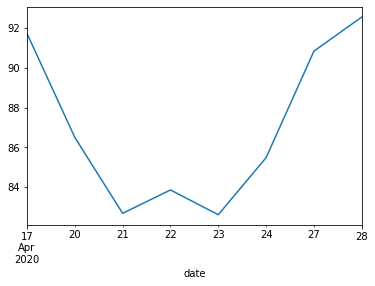

In [278]:
single_stock_history['close'].plot(label="3M Close")

# Get list of historical prices for the first 100 stocks


In [279]:
sp[:100]

,Symbol
0,MMM
1,ABT
2,ABBV
3,ABMD
4,ACN
...,...
95,CE
96,CNC
97,CNP
98,CTL


In [280]:
start = datetime(2016, 1, 1)
end = datetime(2020, 7, 30)

TypeError: 'module' object is not callable

In [236]:
dict_of_stock_to_historical_price_df = {}

In [237]:

start.year, start.month, start.day

(2020, 4, 17)

In [238]:
for stock in sp.Symbol[:5]:
    print(f"Downloading data for {stock}")
    stock_history = getHistoricalPrices(f"{stock}", start, end)
    dict_of_stock_to_historical_price_df[stock] = stock_history

In [239]:
update_s_and_p_dataset(20)

TypeError: update_s_and_p_dataset() missing 1 required positional argument: 'file_path'

In [281]:



def update_s_and_p_dataset(stock_list, file_path, n_stock_to_download=5, default_start =datetime.datetime(2017, 1, 1), end = datetime.datetime.now() ):
    """
    Run through the S and P data and update

    Minimize API calls by only pulling new data
    """

    for stock in stock_list[:n_stock_to_download]:
        print(f"downloading data for {stock}")
        we_have_data = False
        for file in glob.glob(f'{file_path}/*.csv'):
            # check every file to see if we have data on this stock

            if f"{stock}" in file: # we have a data file for this stock
                we_have_data = True
                
        if we_have_data:
            print(f'found existing stock for {stock}')
            # open file
         
            for file in glob.glob(f'{file_path}/*.csv'):
                
                if f"{stock}" in file:
                    print('file', f"{file}")
                    stock_df = pd.read_csv(f"{file}").set_index('date')
                    
                    
                    most_recent_date = stock_df.index.max().split(' ')[0]
                    oldest_date= stock_df.index.min().split(' ')[0]

                    
                    stock_df.index = pd.to_datetime(stock_df.index)

                    most_recent_year, most_recent_month, most_recent_day = most_recent_date.split('-')
                    oldest_year, oldest_month, oldest_day = oldest_date.split('-')

                    start = datetime.datetime(int(most_recent_year), int(most_recent_month), int(most_recent_day) + 1)
                    stock_history = getHistoricalPrices(f"{stock}", start, end)
                    
                    stock_history.index = pd.to_datetime(stock_history.index)

                    #combine new and old stocks
                    stock_history = pd.concat((stock_history, stock_df))

                    # delete the old file
                    os.remove(f"{file}")

        else: # we don't have this stocks data
            stock_history = getHistoricalPrices(f"{stock}", default_start, end)
            oldest_year=default_start.year
            oldest_month=default_start.month
            oldest_day=default_start.day
                
        now = stock_history.index.max()
        now_year = now.year
        now_month = now.month
        now_day = now.day
        # save the file
        print('file =', f'{file_path}/{stock}_{oldest_year}-{oldest_month}-{oldest_day}_to_{now_year}-{now_month}-{now_day}.csv')

        stock_history.to_csv(f'{file_path}/{stock}_{oldest_year}-{oldest_month}-{oldest_day}_to_{now_year}-{now_month}-{now_day}.csv')





In [254]:
# our test stocks
list_of_20_stocks = [ 'adbe', 'are', 'atvi', 'bac', 'ce', 'cern', 'efx', 'emr', 'eqix', 'lb', 'ni', 'peg', 'pg', 'ph', 'pnr', 'pvh', 'rop', 'rost', 'so', 'ual', 'vno']

In [ ]:
reit_stock_list = [
    vno
SUI
DLR
NRZ
REG
FRT
CPT
NLY
PLD
HASI
WELL
DRE
SRG
PEI
IRM
LAMR
NRZ
AGNC
HIW
eqix
are
]

In [287]:
bank_stock_list = ['C',
'BKU',
'CMA',
'STT',
'FITB',
'FTC',
'WFC',
'MTB',
'USB',
'BAC',
'KEY',
'JPM',
'PNC',
'BKU',
'NTRS',
'GBCI',
'PACW',
'WAL',
'FSBW',
'HTBK',
'BCML',
'FHB',
'HAFC',
'CATY',
'BOH',
'COLB',
'CVCY',
'OVLY',
'HOPE',
'CWBC',
'UMPQ',
'UBFO',
'BSRR',
'CVBF',
'TCBK',
'RBB',
'PUB',
'CPG',
'EWBC',
'BMRC',
'PFBC',
'ZION',
'WABC',
'AMRB',
'BOCH',
'FRC',
'SIVB',
'CCB']

In [255]:
# retail_stocks = ['m', 'kss','dds','dbi','anf','aeo','zumz','jwn','gps','lb','tpr','cpri','fl','ctrn','goos','spwh','plce','bke','urbn','gco','scvl','cato','boot',
#                 'levi','ftch','tjx','rost']

In [256]:
list_of_etfs = ['dia', 'spy', 'iwm', 'qqq', 'pej', 'pbj', 'vti',  'vfh', 'ibuy', 'xrt', 'hpt', 'inn', 'bjk']

In [257]:
'abde' in '../data/historical_stock_data/adbe_2017-1-1_to_2020-4-20.csv'

False

In [290]:
file_path_stocks = '../data/historical_stock_data'
file_path_etf = '../data/historical_etf_data'
update_s_and_p_dataset(list_of_etfs, file_path_etf , 30)

downloading data for dia
found existing stock for dia
file ../data/historical_etf_data/dia_2017-01-03_to_2020-5-1.csv
file = ../data/historical_etf_data/dia_2017-01-03_to_2020-5-8.csv
downloading data for spy
found existing stock for spy
file ../data/historical_etf_data/spy_2017-01-03_to_2020-5-1.csv
file = ../data/historical_etf_data/spy_2017-01-03_to_2020-5-8.csv
downloading data for iwm
found existing stock for iwm
file ../data/historical_etf_data/iwm_2017-01-03_to_2020-5-1.csv
file = ../data/historical_etf_data/iwm_2017-01-03_to_2020-5-8.csv
downloading data for qqq
found existing stock for qqq
file ../data/historical_etf_data/qqq_2017-01-03_to_2020-5-1.csv
file = ../data/historical_etf_data/qqq_2017-01-03_to_2020-5-8.csv
downloading data for pej
found existing stock for pej
file ../data/historical_etf_data/pej_2017-01-03_to_2020-5-1.csv
file = ../data/historical_etf_data/pej_2017-01-03_to_2020-5-8.csv
downloading data for pbj
found existing stock for pbj
file ../data/historical_et

KeyError: "None of ['date'] are in the columns"

In [44]:
dict_of_stock_to_historical_price_df['MMM'].index.max() # index is dat as returned from the API

Timestamp('2020-04-17 00:00:00')

In [70]:
mmm_df = pd.read_csv('../data/MMM_2016-01-04_to_2020-04-17.csv')

In [72]:
mmm_df.date.max()

'2020-04-17'

In [68]:
dict_of_stock_to_historical_price_df['MMM'].to_csv('../data/MMM_2016-01-04_to_2020-04-17.csv')